In [74]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

In [75]:
d1 = 183.3 #joint 1 height [mm]
d2 = 737.31 #joint 2 radius [mm]
d3 = 387.8 #joint 3 radius [mm]
d4 = 95.5 #joint 4 radius [mm]
d5 = 115.5 #joint 5 radius [mm]
d6 = 76.8 #end effector offset
alpha = sp.pi/2 #standard 90 degree angle



In [76]:
#Initialize symbols
thetai = sp.Symbol('theta_i')
theta1 = sp.Symbol('theta_1')
theta2 = sp.Symbol('theta_2')
theta3 = sp.Symbol('theta_3')
theta4 = sp.Symbol('theta_4')
theta5 = sp.Symbol('theta_5')
theta6 = sp.Symbol('theta_6')
t = sp.Symbol('t')
ai = sp.Symbol('a_i')
di = sp.Symbol('d_i')
alphai = sp.Symbol('alpha_i')
pi = sp.Symbol('pi')



In [77]:
#Create dh table based on chosen coordinate frames
dh_table = {
    "": ["to 1", "to 2", "to 3", "to 4", "to 5", "to 6"],
    thetai: [theta1, pi/2 + theta2, theta3, pi/2 + theta4, theta5, theta6],
    ai: [0, d2, d3, 0, 0, 0],
    di: [d1, 0, 0, -d4, d5, d6],
    alphai: [alpha, 0, 0, alpha, -alpha, 0]

}

df = pd.DataFrame(dh_table)
df

,,theta_i,a_i,d_i,alpha_i
0,to 1,theta_1,0.00,183.3,pi/2
1,to 2,pi/2 + theta_2,737.31,0.0,0
2,to 3,theta_3,387.80,0.0,0
3,to 4,pi/2 + theta_4,0.00,-95.5,pi/2
4,to 5,theta_5,0.00,115.5,-pi/2
5,to 6,theta_6,0.00,76.8,0


In [78]:
#A1 transformation matrix
A1tz = sp.Matrix([
    [1,0,0,0],
    [0,1,0,0],
    [0,0,1,d1],
    [0,0,0,1]])

A1rz = sp.Matrix([
    [sp.cos(theta1),-sp.sin(theta1),0,0],
    [sp.sin(theta1),sp.cos(theta1),0,0],
    [0,0,1,0],
    [0,0,0,1]])

A1rx = sp.Matrix([
    [1,0,0,0],
    [0,sp.cos(alpha),-sp.sin(alpha),0],
    [0,sp.sin(alpha),sp.cos(alpha),0],
    [0,0,0,1]])
    
A1 = A1rz*A1tz*A1rx




In [79]:
#A2 transformation matrix
A2tx = sp.Matrix([
    [1,0,0,d2],
    [0,1,0,0],
    [0,0,1,0],
    [0,0,0,1]])

A2rz = sp.Matrix([
    [sp.cos((sp.pi/2)+theta2),-sp.sin((sp.pi/2)+theta2),0,0],
    [sp.sin((sp.pi/2)+theta2),sp.cos((sp.pi/2)+theta2),0,0],
    [0,0,1,0],
    [0,0,0,1]])
    
A2 = A2rz*A2tx
A2


Matrix([
[-sin(theta_2), -cos(theta_2), 0, -737.31*sin(theta_2)],
[ cos(theta_2), -sin(theta_2), 0,  737.31*cos(theta_2)],
[            0,             0, 1,                    0],
[            0,             0, 0,                    1]])

In [80]:
#A3 transformation matrix
A3tx = sp.Matrix([
    [1,0,0,d3],
    [0,1,0,0],
    [0,0,1,0],
    [0,0,0,1]])

A3rz = sp.Matrix([
    [sp.cos(theta3),-sp.sin(theta3),0,0],
    [sp.sin(theta3),sp.cos(theta3),0,0],
    [0,0,1,0],
    [0,0,0,1]])
    
A3 = A3rz*A3tx
A3



Matrix([
[cos(theta_3), -sin(theta_3), 0, 387.8*cos(theta_3)],
[sin(theta_3),  cos(theta_3), 0, 387.8*sin(theta_3)],
[           0,             0, 1,                  0],
[           0,             0, 0,                  1]])

In [81]:
#A4 transformation matrix
A4tz = sp.Matrix([
    [1,0,0,0],
    [0,1,0,0],
    [0,0,1,d4],
    [0,0,0,1]])

A4rz = sp.Matrix([
    [sp.cos((sp.pi/2)+theta4),-sp.sin((sp.pi/2)+theta4),0,0],
    [sp.sin((sp.pi/2)+theta4),sp.cos((sp.pi/2)+theta4),0,0],
    [0,0,1,0],
    [0,0,0,1]])

A4rx = sp.Matrix([
    [1,0,0,0],
    [0,sp.cos(alpha),-sp.sin(alpha),0],
    [0,sp.sin(alpha),sp.cos(alpha),0],
    [0,0,0,1]])

A4 = A4rz*A4tz*A4rx
A4


Matrix([
[-sin(theta_4), 0, cos(theta_4),    0],
[ cos(theta_4), 0, sin(theta_4),    0],
[            0, 1,            0, 95.5],
[            0, 0,            0,    1]])

In [82]:
#A5 transformation matrix
A5tz = sp.Matrix([
    [1,0,0,0],
    [0,1,0,0],
    [0,0,1,d5],
    [0,0,0,1]])

A5rz = sp.Matrix([
    [sp.cos(theta5),-sp.sin(theta5),0,0],
    [sp.sin(theta5),sp.cos(theta5),0,0],
    [0,0,1,0],
    [0,0,0,1]])

A5rx = sp.Matrix([
    [1,0,0,0],
    [0,sp.cos(-alpha),-sp.sin(-alpha),0],
    [0,sp.sin(-alpha),sp.cos(-alpha),0],
    [0,0,0,1]])
    
A5 = A5rz*A5tz*A5rx
A5

Matrix([
[cos(theta_5),  0, -sin(theta_5),     0],
[sin(theta_5),  0,  cos(theta_5),     0],
[           0, -1,             0, 115.5],
[           0,  0,             0,     1]])

In [83]:
#A6 transformation matrix
A6tz = sp.Matrix([
    [1,0,0,0],
    [0,1,0,0],
    [0,0,1,d6],
    [0,0,0,1]])

A6rz = sp.Matrix([
    [sp.cos(theta6),-sp.sin(theta6),0,0],
    [sp.sin(theta6),sp.cos(theta6),0,0],
    [0,0,1,0],
    [0,0,0,1]])

A6 = A6rz*A6tz
A6


Matrix([
[cos(theta_6), -sin(theta_6), 0,    0],
[sin(theta_6),  cos(theta_6), 0,    0],
[           0,             0, 1, 76.8],
[           0,             0, 0,    1]])

In [84]:
A = A1*A2*A3*A4*A5*A6 #Final transformation matrix with respect to base frame

#Validate transformation matrix:
Av1= A.subs([ #starting position, all thetas = 0
    (theta1,0),
    (theta2,0),
    (theta3,0),
    (theta4,0),
    (theta5,0),
    (theta6,0)])

Av2 = A.subs([ #first joint rotated 90 degrees
    (theta1,sp.pi/2),
    (theta2,0),
    (theta3,0),
    (theta4,0),
    (theta5,0),
    (theta6,0)])


Av3= A.subs([ #shoulder rotated 90 degrees
    (theta1,0),
    (theta2,sp.pi/2),
    (theta3,0),
    (theta4,0),
    (theta5,0),
    (theta6,0)])

Av4= A.subs([ # elbow rotated 90 degrees
    (theta1,0),
    (theta2,0),
    (theta3,sp.pi/2),
    (theta4,0),
    (theta5,0),
    (theta6,0)])

Av5= A.subs([ # wrist rotated 90 degrees
    (theta1,0),
    (theta2,0),
    (theta3,0),
    (theta4,sp.pi/2),
    (theta5,0),
    (theta6,0)])

print("Transformation matrix validation")
print("start position: x = ", Av1[0,3], "y = ", Av1[1,3], "z = ", Av1[2,3] )
print("first joint rotated 90 degrees: x = ", Av2[0,3], "y = ", Av2[1,3], "z = ", Av2[2,3])
print("shoulder rotated 90 degrees: x = ", Av3[0,3], "y = ", Av3[1,3], " z = ", Av3[2,3])
print("elbow rotated 90 degrees: x = ", Av4[0,3], " y = ", Av4[1,3], " z = ",Av4[2,3])
print("wrist rotated 90 degrees: x = ", Av5[0,3], " y = ", Av5[1,3], " z = ", Av5[2,3])

Transformation matrix validation
start position: x =  0 y =  -172.300000000000 z =  1423.91000000000
first joint rotated 90 degrees: x =  172.300000000000 y =  0 z =  1423.91000000000
shoulder rotated 90 degrees: x =  -1240.61000000000 y =  -172.300000000000  z =  183.300000000000
elbow rotated 90 degrees: x =  -503.300000000000  y =  -172.300000000000  z =  920.610000000000
wrist rotated 90 degrees: x =  -115.500000000000  y =  -172.300000000000  z =  1308.41000000000


In [104]:
#Create O matrix
O = sp.zeros(3,7)
a_array = [1,A1,A2,A3,A4,A5,A6]
product = sp.eye(4)
for i in range(1,7):
    product = product*a_array[i]
    O[:,i] = sp.Matrix([
        [(product)[0,3]],
        [(product)[1,3]],
        [(product)[2,3]]])

#Create Z matrix
z = sp.zeros(3,7)
z[:,0] = sp.Matrix([[0],[0],[1]])
product = sp.eye(4)
for i in range(1,7):
    product = product*a_array[i]
    z[:,i] = sp.Matrix([
        [(product)[0,2]],
        [(product)[1,2]],
        [(product)[2,2]]])
O

Matrix([
[0,     0, -737.31*sin(theta_2)*cos(theta_1), -387.8*sin(theta_2)*cos(theta_1)*cos(theta_3) - 737.31*sin(theta_2)*cos(theta_1) - 387.8*sin(theta_3)*cos(theta_1)*cos(theta_2),  95.5*sin(theta_1) - 387.8*sin(theta_2)*cos(theta_1)*cos(theta_3) - 737.31*sin(theta_2)*cos(theta_1) - 387.8*sin(theta_3)*cos(theta_1)*cos(theta_2), 115.5*(sin(theta_2)*sin(theta_3)*cos(theta_1) - cos(theta_1)*cos(theta_2)*cos(theta_3))*sin(theta_4) + 115.5*(-sin(theta_2)*cos(theta_1)*cos(theta_3) - sin(theta_3)*cos(theta_1)*cos(theta_2))*cos(theta_4) + 95.5*sin(theta_1) - 387.8*sin(theta_2)*cos(theta_1)*cos(theta_3) - 737.31*sin(theta_2)*cos(theta_1) - 387.8*sin(theta_3)*cos(theta_1)*cos(theta_2), -76.8*((sin(theta_2)*sin(theta_3)*cos(theta_1) - cos(theta_1)*cos(theta_2)*cos(theta_3))*cos(theta_4) - (-sin(theta_2)*cos(theta_1)*cos(theta_3) - sin(theta_3)*cos(theta_1)*cos(theta_2))*sin(theta_4))*sin(theta_5) + 115.5*(sin(theta_2)*sin(theta_3)*cos(theta_1) - cos(theta_1)*cos(theta_2)*cos(theta_3))*sin(thet

In [86]:
#Calculate jacobian (method 1)
from sympy import pprint
j = sp.zeros(6,6)
for i in range(0,6):
    j[:,i] = sp.Matrix([
        [(z.col(i)).cross((O.col(6))-(O.col(i)))],
        [z.col(i)]])

pprint(j, use_unicode = True)

⎡76.8⋅((sin(θ₁)⋅sin(θ₂)⋅sin(θ₃) - sin(θ₁)⋅cos(θ₂)⋅cos(θ₃))⋅cos(θ₄) - (-sin(θ₁) ↪
⎢                                                                              ↪
⎢-76.8⋅((sin(θ₂)⋅sin(θ₃)⋅cos(θ₁) - cos(θ₁)⋅cos(θ₂)⋅cos(θ₃))⋅cos(θ₄) - (-sin(θ₂ ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎣                                                                              ↪

↪ ⋅sin(θ₂)⋅cos(θ₃) - sin(θ₁)⋅sin(θ₃)⋅cos(θ₂))⋅sin(θ₄))⋅sin(θ₅) - 115.5⋅(sin(θ₁ ↪
↪                          

In [87]:
#initialize inputs
increment = 0.1 #time increment [s]
duration = 20 #total time [s]
arraysize = int(duration/increment) 
time = np.arange(0, duration, increment) #time array

#initial end effector posiitons with respect to base frame [mm]
ee_x_initial = 0 
ee_y_initial = -172.3-45
ee_z_initial = d1+d2+d3+d5

#Separate end effector path into 6 paths
path1_x_final = -50 #start position x of drawn shape
path1_y_final = ee_y_initial - 10 #start position y of drawn shape
path1_z_final = 1350 #start position z of drawn shape

#calculate distances traveled during paths
path1_distance = sp.sqrt(((ee_x_initial-path1_x_final)**2)+((ee_y_initial-path1_y_final)**2)+(ee_z_initial-path1_z_final)**2)
path2_distance = 50*sp.pi
path3_distance = 50
path4_distance = 100
path5_distance = 50
path6_distance = path1_distance
total_distance = path1_distance+path2_distance+path3_distance+path4_distance+path5_distance+path6_distance

#calculate time taken for each path
path1_time = (path1_distance/total_distance)*duration
path2_time = (path2_distance/total_distance)*duration
path3_time = (path3_distance/total_distance)*duration
path4_time = (path4_distance/total_distance)*duration
path5_time = (path5_distance/total_distance)*duration
path6_time = (path6_distance/total_distance)*duration

#calculate start time of each path
path1_start = 0
path2_start = path1_time.round(1)
path3_start = (path2_start+path2_time).round(1)
path4_start = (path3_start+path3_time).round(1)
path5_start = (path4_start+path4_time).round(1)
path6_start = (path5_start+path5_time).round(1)




In [88]:

#calculate path1 velocities from path 1 time and distance
path1_xdot = (path1_x_final-ee_x_initial)/path1_time
path1_ydot = (path1_y_final-ee_y_initial)/path1_time
path1_zdot = (path1_z_final-ee_z_initial)/path1_time

#equation for path 2 position with respec to time
path2_x = path1_x_final-(50*sp.cos((sp.pi/path2_time)*t))
path2_y = path1_y_final
path2_z = path1_z_final+(50*sp.sin((sp.pi/path2_time)*t))

#equation for path 2 velocities with repect to time
path2_xdot = sp.diff(path2_x,t)
path2_ydot = sp.diff(path2_y,t)
path2_zdot = sp.diff(path2_z,t)

#calculate path 3 velocities
path3_xdot = 0
path3_ydot = 0
path3_zdot = -50/path3_time

#calculate path 4 velocities
path4_xdot = -100/path4_time
path4_ydot = 0
path4_zdot = 0

#calculate path 5 velocities
path5_xdot = 0
path5_ydot = 0
path5_zdot = 50/path5_time

#calculate path 6 velocities
path6_xdot = -path1_xdot
path6_ydot = -path1_ydot
path6_zdot = -path1_zdot

#create xdot master matrix for all paths 
XDOT = sp.Matrix([
    [path1_xdot, path2_xdot, path3_xdot, path4_xdot, path5_xdot, path6_xdot],
    [path1_ydot, path2_ydot, path3_ydot, path4_ydot, path5_ydot, path6_ydot],
    [path1_zdot, path2_zdot, path3_zdot, path4_zdot, path5_zdot, path6_zdot],
    [0,0,0,0,0,0],
    [0,0,0,0,0,0],
    [0,0,0,0,0,0]])



In [89]:

#initialize array sizes for each path (for use in for loops)
path1_arraysize = int(path1_time/increment)
path2_arraysize = int(path2_time/increment)
path3_arraysize = int(path3_time/increment)
path4_arraysize = int(path4_time/increment)
path5_arraysize = int(path5_time/increment)
path6_arraysize = int(path6_time/increment)



In [106]:
#calculate initial inverse jacobian to obtain initial thetadot values
jinv_initial = (j.subs([
    (theta1,0),
    (theta2,0),
    (theta3,0),
    (theta4,0),
    (theta5,0),
    (theta6,0)])).pinv()

thetadot_initial = jinv_initial*XDOT[:,0] #initial thetadot values















In [117]:
#PATH1
#initialize theta/thetadot arrays with zeros
THETA_path1 = sp.zeros(6,path1_arraysize)
THETADOT_path1 = sp.zeros(6,path1_arraysize)


for i in range(0,6):
    THETADOT_path1[i,0] = thetadot_initial[i] #populate thetadot with initial values

#Calculate theta/thetadot for path 1
for n in range(1,path1_arraysize):
    for i in range(0,6):
        THETA_path1[i,n] = (THETA_path1[i,n-1]+((THETADOT_path1[i,n-1])*increment)).round(5)
    jsubs = j.subs([
        (theta1,THETA_path1[0,n]),
        (theta2,THETA_path1[1,n]),
        (theta3,THETA_path1[2,n]),
        (theta4,THETA_path1[3,n]),
        (theta5,THETA_path1[4,n]),
        (theta6,THETA_path1[5,n])])
    jinv = jsubs.pinv()
    thetadot = jinv*XDOT[:,0]
    for i in range(0,6):
        THETADOT_path1[i,n] = thetadot[i]

# (THETA_path1[1,1]) + (THETADOT_path1[1,1])*increment
THETA_path1[1,1]




0.00123

In [92]:
#PATH2
THETA_path2 = sp.zeros(6,path2_arraysize)
THETADOT_path2 = sp.zeros(6,path2_arraysize)

for i in range(0,6): #populate theta/thetadot initial values with last values from previous path
    THETA_path2[i,0] = THETA_path1[i,-1]
    THETADOT_path2[i,0] = THETADOT_path1[i,-1]
    
for n in range(1,path2_arraysize):
    for i in range(0,6):
        THETA_path2[i,n] = (THETA_path2[i,n-1]+((THETADOT_path2[i,n-1])*increment)).round(5)
    jsubs = j.subs([
        (theta1,THETA_path2[0,n]),
        (theta2,THETA_path2[1,n]),
        (theta3,THETA_path2[2,n]),
        (theta4,THETA_path2[3,n]),
        (theta5,THETA_path2[4,n]),
        (theta6,THETA_path2[5,n])])
    jinv = jsubs.pinv()
    thetadot = jinv*((XDOT[:,1]).subs([(t,time[n])])) #substituting time values into XDOT
    for i in range(0,6):
        THETADOT_path2[i,n] = thetadot[i]



In [93]:
#PATH3
THETA_path3 = sp.zeros(6,path3_arraysize)
THETADOT_path3 = sp.zeros(6,path3_arraysize)

for i in range(0,6):
    THETA_path3[i,0] = THETA_path2[i,-1]
    THETADOT_path3[i,0] = THETADOT_path2[i,-1]

for n in range(1,path3_arraysize):
    for i in range(0,6):
        THETA_path3[i,n] = (THETA_path3[i,n-1]+((THETADOT_path3[i,n-1])*increment)).round(5)
    jsubs = j.subs([
        (theta1,THETA_path3[0,n]),
        (theta2,THETA_path3[1,n]),
        (theta3,THETA_path3[2,n]),
        (theta4,THETA_path3[3,n]),
        (theta5,THETA_path3[4,n]),
        (theta6,THETA_path3[5,n])])
    jinv = jsubs.pinv()
    thetadot = jinv*(XDOT[:,2])
    for i in range(0,6):
        THETADOT_path3[i,n] = thetadot[i]


In [94]:
#PATH4
THETA_path4 = sp.zeros(6,path4_arraysize)
THETADOT_path4 = sp.zeros(6,path4_arraysize)

for i in range(0,6):
    THETA_path4[i,0] = THETA_path3[i,-1]
    THETADOT_path4[i,0] = THETADOT_path3[i,-1]

for n in range(1,path4_arraysize):
    for i in range(0,6):
        THETA_path4[i,n] = (THETA_path4[i,n-1]+((THETADOT_path4[i,n-1])*increment)).round(5)
    jsubs = j.subs([
        (theta1,THETA_path4[0,n]),
        (theta2,THETA_path4[1,n]),
        (theta3,THETA_path4[2,n]),
        (theta4,THETA_path4[3,n]),
        (theta5,THETA_path4[4,n]),
        (theta6,THETA_path4[5,n])])
    jinv = jsubs.pinv()
    thetadot = jinv*(XDOT[:,3])
    for i in range(0,6):
        THETADOT_path4[i,n] = thetadot[i]


In [95]:
#PATH 5
THETA_path5 = sp.zeros(6,path5_arraysize)
THETADOT_path5 = sp.zeros(6,path5_arraysize)

for i in range(0,6):
    THETA_path5[i,0] = THETA_path4[i,-1]
    THETADOT_path5[i,0] = THETADOT_path4[i,-1]

for n in range(1,path5_arraysize):
    for i in range(0,6):
        THETA_path5[i,n] = (THETA_path5[i,n-1]+((THETADOT_path5[i,n-1])*increment)).round(5)
    jsubs = j.subs([
        (theta1,THETA_path5[0,n]),
        (theta2,THETA_path5[1,n]),
        (theta3,THETA_path5[2,n]),
        (theta4,THETA_path5[3,n]),
        (theta5,THETA_path5[4,n]),
        (theta6,THETA_path5[5,n])])
    jinv = jsubs.pinv()
    thetadot = jinv*(XDOT[:,4])
    for i in range(0,6):
        THETADOT_path5[i,n] = thetadot[i]



In [96]:
#PATH 6
THETA_path6 = sp.zeros(6,path6_arraysize)
THETADOT_path6 = sp.zeros(6,path6_arraysize)

for i in range(0,6):
    THETA_path6[i,0] = THETA_path5[i,-1]
    THETADOT_path6[i,0] = THETADOT_path5[i,-1]

for n in range(1,path6_arraysize):
    for i in range(0,6):
        THETA_path6[i,n] = (THETA_path6[i,n-1]+((THETADOT_path6[i,n-1])*increment)).round(5)
    jsubs = j.subs([
        (theta1,THETA_path6[0,n]),
        (theta2,THETA_path6[1,n]),
        (theta3,THETA_path6[2,n]),
        (theta4,THETA_path6[3,n]),
        (theta5,THETA_path6[4,n]),
        (theta6,THETA_path6[5,n])])
    jinv = jsubs.pinv()
    thetadot = jinv*(XDOT[:,5])
    for i in range(0,6):
        THETADOT_path6[i,n] = thetadot[i]




In [97]:
#PLOTTING END EFFECTOR POSITION
end_effector_xyz = sp.zeros(3,arraysize)
#PATH 1
for i in range(0,path1_arraysize):
    Asubs = A.subs([
        (theta1,THETA_path1[0,i]),
        (theta2,THETA_path1[1,i]),
        (theta3,THETA_path1[2,i]),
        (theta4,THETA_path1[3,i]),
        (theta5,THETA_path1[4,i]),
        (theta6,THETA_path1[5,i])])
    end_effector_xyz[0,i] = Asubs[0,3]
    end_effector_xyz[1,i] = Asubs[1,3]
    end_effector_xyz[2,i] = Asubs[2,3]

#PATH2
r = path1_arraysize
for i in range(r,r+path2_arraysize):
    Asubs = A.subs([
        (theta1,THETA_path2[0,i-r]),
        (theta2,THETA_path2[1,i-r]),
        (theta3,THETA_path2[2,i-r]),
        (theta4,THETA_path2[3,i-r]),
        (theta5,THETA_path2[4,i-r]),
        (theta6,THETA_path2[5,i-r])])
    end_effector_xyz[0,i] = Asubs[0,3]
    end_effector_xyz[1,i] = Asubs[1,3]
    end_effector_xyz[2,i] = Asubs[2,3]

#PATH3
r = r+path2_arraysize
for i in range(r,r+path3_arraysize):
    Asubs = A.subs([
        (theta1,THETA_path3[0,i-r]),
        (theta2,THETA_path3[1,i-r]),
        (theta3,THETA_path3[2,i-r]),
        (theta4,THETA_path3[3,i-r]),
        (theta5,THETA_path3[4,i-r]),
        (theta6,THETA_path3[5,i-r])])
    end_effector_xyz[0,i] = Asubs[0,3]
    end_effector_xyz[1,i] = Asubs[1,3]
    end_effector_xyz[2,i] = Asubs[2,3]

#PATH4
r = r+path3_arraysize
for i in range(r,r+path4_arraysize):
    Asubs = A.subs([
        (theta1,THETA_path4[0,i-r]),
        (theta2,THETA_path4[1,i-r]),
        (theta3,THETA_path4[2,i-r]),
        (theta4,THETA_path4[3,i-r]),
        (theta5,THETA_path4[4,i-r]),
        (theta6,THETA_path4[5,i-r])])
    end_effector_xyz[0,i] = Asubs[0,3]
    end_effector_xyz[1,i] = Asubs[1,3]
    end_effector_xyz[2,i] = Asubs[2,3]

#PATH5
r = r+path4_arraysize
for i in range(r,r+path5_arraysize):
    Asubs = A.subs([
        (theta1,THETA_path5[0,i-r]),
        (theta2,THETA_path5[1,i-r]),
        (theta3,THETA_path5[2,i-r]),
        (theta4,THETA_path5[3,i-r]),
        (theta5,THETA_path5[4,i-r]),
        (theta6,THETA_path5[5,i-r])])
    end_effector_xyz[0,i] = Asubs[0,3]
    end_effector_xyz[1,i] = Asubs[1,3]
    end_effector_xyz[2,i] = Asubs[2,3]

#PATH6
r = r+path5_arraysize
for i in range(r,r+path6_arraysize):
    Asubs = A.subs([
        (theta1,THETA_path6[0,i-r]),
        (theta2,THETA_path6[1,i-r]),
        (theta3,THETA_path6[2,i-r]),
        (theta4,THETA_path6[3,i-r]),
        (theta5,THETA_path6[4,i-r]),
        (theta6,THETA_path6[5,i-r])])
    end_effector_xyz[0,i] = Asubs[0,3]
    end_effector_xyz[1,i] = Asubs[1,3]
    end_effector_xyz[2,i] = Asubs[2,3]



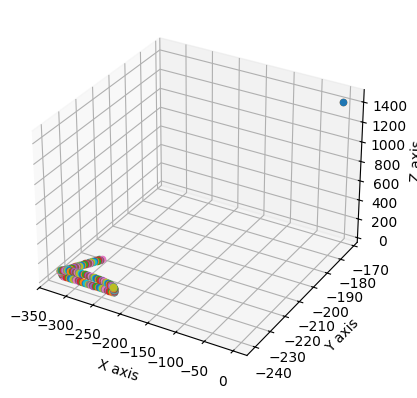

In [100]:
#PLOT END EFFECTOR PATH
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(0,arraysize-3): #indexing error caused last 3 position values to be 0
    
    ax.scatter([end_effector_xyz[0,i]], [end_effector_xyz[1,i]], [end_effector_xyz[2,i]])


# Set labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')


# Show plot
plt.show()

